In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter1=None, vcenter2=None, vcenter3=None, clip=False):
        self.vcenter1 = vcenter1
        self.vcenter2 = vcenter2
        self.vcenter3 = vcenter3
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        # Note also that we must extrapolate beyond vmin/vmax
        x, y = [self.vmin, self.vcenter1, self.vcenter2, self.vcenter3, self.vmax], [0, 0.25, 0.5, 0.75, 1.]
        return np.ma.masked_array(np.interp(value, x, y,
                                            left=-np.inf, right=np.inf))

    def inverse(self, value):
        y, x = [self.vmin, self.vcenter1, self.vcenter2, self.vcenter3, self.vmax], [0, 0.25, 0.5, 0.75, 1.]
        return np.interp(value, x, y, left=-np.inf, right=np.inf)

font = {'fontname':'Times New Roman',
       'size': 7}

In [3]:
#data1 = pd.read_csv('/kaggle/input/normalized-new/normalized.csv', delimiter=';', decimal=',', header=0, index_col=0)
#data2 = pd.read_csv('/kaggle/input/normalized-new/normalized2.csv', delimiter=';', decimal=',', header=0, index_col=0)
#npdata1 = np.array(data1)
#npdata2 = np.array(data2)
#x=np.array(np.arange(0, 6, 1))
#y=np.array(np.arange(0, 9, 1))
#X, Y = np.meshgrid(x, y)
#Z = npdata1[:,1:-1]
#print(Z)

data5 = pd.read_csv('/kaggle/input/style-ratio-grid/c10-acc.csv', delimiter=';', decimal=',', header=0, index_col=0)
data6 = pd.read_csv('/kaggle/input/style-ratio-grid/c10-rob.csv', delimiter=';', decimal=',', header=0, index_col=0)
data1 = pd.read_csv('/kaggle/input/style-ratio-grid/c100-acc.csv', delimiter=';', decimal=',', header=0, index_col=0)
data2 = pd.read_csv('/kaggle/input/style-ratio-grid/c100-rob.csv', delimiter=';', decimal=',', header=0, index_col=0)
data3 = pd.read_csv('/kaggle/input/style-ratio-grid/tin-acc.csv', delimiter=';', decimal=',', header=0, index_col=0)
data4 = pd.read_csv('/kaggle/input/style-ratio-grid/tin-rob.csv', delimiter=';', decimal=',', header=0, index_col=0)
npdata5 = np.array(data5).T
npdata6 = np.array(data6).T
npdata1 = np.array(data1).T
npdata2 = np.array(data2).T
npdata3 = np.array(data3).T
npdata4 = np.array(data4).T
x=np.array(np.arange(0, 7, 1))
y=np.array(np.arange(0, 5, 1))
X, Y = np.meshgrid(x, y)
x1=np.array(np.arange(0, 8, 1))
y1=np.array(np.arange(0, 6, 1))
X1, Y1 = np.meshgrid(x1, y1)
Z5 = npdata5
Z6 = npdata6
Z1 = npdata1
Z2 = npdata2
Z3 = npdata3
Z4 = npdata4
print(Z3)


[[72.7  72.64 72.37 72.22 72.25 71.88 71.69 71.66]
 [72.5  72.22 72.17 72.2  72.   72.   71.69 71.46]
 [72.08 72.15 72.18 71.86 71.63 71.52 71.39 71.1 ]
 [72.13 71.93 71.7  71.6  71.47 71.1  71.11 70.92]
 [71.67 71.53 71.26 71.19 71.14 70.92 70.65 70.44]
 [71.29 71.1  70.87 70.72 70.6  70.38 70.2  69.93]]


In [4]:
#3D plot for normalized Lp norm corruption training and test

#midnorm = MidpointNormalize(vmin=79.4, vcenter1=79.9, vcenter2=80.3, vcenter3=80.7, vmax=81.2)
#bild1 = plt.figure(figsize=[6,4.5], dpi=300)
#ax = plt.axes(projection='3d')
#ax.set_xlabel('stylization ratio (original)', fontdict=font, labelpad=-4)
#ax.set_ylabel('stylization ratio (generated)', fontdict=font, labelpad=-4)
#ax.set_zlabel('Normalized Accuracy [%]', fontdict=font, labelpad=-6)
#plt.xticks(np.arange(0, 5, 1), ('0', '0.1', '0.2', '0.3', '0.4'))
#plt.yticks(np.arange(0, 5, 1), ('0', '0.1', '0.2', '0.3', '0.4'))
##ax.xaxis.pane.fill = False
##ax.yaxis.pane.fill = False
##ax.zaxis.pane.fill = False
#ax.plot_surface(X, Y, Z1, rstride=1, cstride=1,
#                cmap='viridis', norm=midnorm, edgecolor='none')
#ax.set_zticks([79,80,81,82])
#ax.grid(visible=None)
#ax.tick_params(axis='both', which='major', labelsize=7, pad=-2)
#ax.tick_params(axis='both', which='minor', labelsize=7, pad=-2)
#ax.view_init(35, 45)
#
#bild1.savefig("3d-pnorm-generalization.pdf",dpi=300)
#bild1.savefig("3d-pnorm-generalization.png",dpi=300)

<Figure size 1500x1200 with 0 Axes>

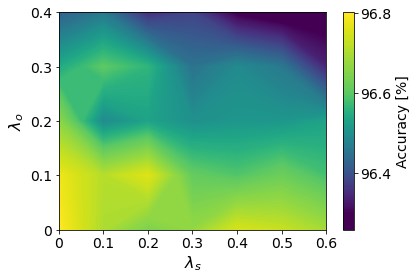

In [5]:
midnorm1 = MidpointNormalize(vmin=96.3, vcenter1=96.4, vcenter2=96.5, vcenter3=96.6, vmax=96.8)
font = {'size':16}

bild2 = plt.figure(figsize=[5,4], dpi=300) 
bild2, ax = plt.subplots(1,1) 
ax.set_xlabel(r'$\lambda_s$', fontdict=font, labelpad=+4)
ax.set_ylabel(r'$\lambda_o$', fontdict=font, labelpad=+4)

plt.xticks(np.arange(0, 7, 1), ('0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6')) 
plt.yticks(np.arange(0, 5, 1), ('0', '0.1', '0.2', '0.3', '0.4'))

plot = plt.contourf(X, Y, Z5, cmap='viridis', levels=200, norm = midnorm1)

ax.tick_params(axis='both', which='major', labelsize=14, pad=+3) 
ax.tick_params(axis='both', which='minor', labelsize=14, pad=+5)

cbar = bild2.colorbar(plot, ticks=[96.2,96.4,96.6,96.8], pad = 0.05) # Add a colorbar to a plot 
cbar.set_label(label='Accuracy [%]', size=14) 
cbar.ax.tick_params(labelsize=14, pad=+3)

bild2.savefig("C10-acc-stylized-ratio-grid.pdf",dpi=300, bbox_inches='tight') 
bild2.savefig("C10-acc-stylized-ratio-grid.png",dpi=300, bbox_inches='tight')

##### midnorm1 = MidpointNormalize(vmin=96.3, vcenter1=96.4, vcenter2=96.5, vcenter3=96.6, vmax=96.8)
font = {'size':16}

bild2 = plt.figure(figsize=[5,4], dpi=300)
bild2, ax = plt.subplots(1,1)
ax.set_xlabel(r'$\lambda_o$', fontdict=font, labelpad=+4)
ax.set_ylabel(r'$\lambda_s$', fontdict=font, labelpad=+4)

plt.xticks(np.arange(0, 7, 1), ('0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'))
plt.yticks(np.arange(0, 5, 1), ('0', '0.1', '0.2', '0.3', '0.4'))

plot = plt.contourf(X, Y, Z5, cmap='viridis', levels=200, norm = midnorm1)

ax.tick_params(axis='both', which='major', labelsize=14, pad=+3)
ax.tick_params(axis='both', which='minor', labelsize=14, pad=+5)

cbar = bild2.colorbar(plot, ticks=[96.2,96.4,96.6,96.8], pad = 0.05) # Add a colorbar to a plot
cbar.set_label(label='Accuracy [%]', size=14)
cbar.ax.tick_params(labelsize=14, pad=+3)

bild2.savefig("C10-acc-stylized-ratio-grid.pdf",dpi=300, bbox_inches='tight')
bild2.savefig("C10-acc-stylized-ratio-grid.png",dpi=300, bbox_inches='tight')

<Figure size 1500x1200 with 0 Axes>

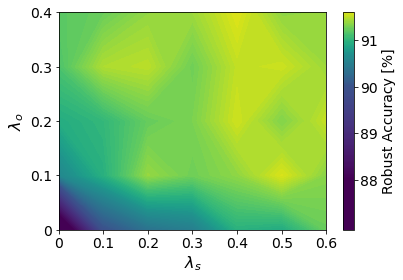

In [6]:
midnorm1 = MidpointNormalize(vmin=88, vcenter1=90, vcenter2=90.7, vcenter3=91.2, vmax=91.7)
font = {'size':16}

bild2 = plt.figure(figsize=[5,4], dpi=300)
bild2, ax = plt.subplots(1,1)
ax.set_xlabel(r'$\lambda_s$', fontdict=font, labelpad=+4)
ax.set_ylabel(r'$\lambda_o$', fontdict=font, labelpad=+4)

plt.xticks(np.arange(0, 7, 1), ('0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'))
plt.yticks(np.arange(0, 5, 1), ('0', '0.1', '0.2', '0.3', '0.4'))

plot = plt.contourf(X, Y, Z6, cmap='viridis', levels=200, norm = midnorm1)

ax.tick_params(axis='both', which='major', labelsize=14, pad=+3)
ax.tick_params(axis='both', which='minor', labelsize=14, pad=+5)

cbar = bild2.colorbar(plot, ticks=[88,89,90,91], pad = 0.05) # Add a colorbar to a plot
cbar.set_label(label='Robust Accuracy [%]', size=14)
cbar.ax.tick_params(labelsize=14, pad=+3)

bild2.savefig("C10-rob-stylized-ratio-grid.pdf",dpi=300, bbox_inches='tight')
bild2.savefig("C10-rob-stylized-ratio-grid.png",dpi=300, bbox_inches='tight')

<Figure size 1500x1200 with 0 Axes>

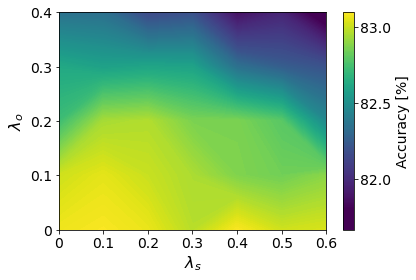

In [7]:
midnorm1 = MidpointNormalize(vmin=81.8, vcenter1=82.2, vcenter2=82.5, vcenter3=82.8, vmax=83.1)
font = {'size':16}

bild2 = plt.figure(figsize=[5,4], dpi=300)
bild2, ax = plt.subplots(1,1)
ax.set_xlabel(r'$\lambda_s$', fontdict=font, labelpad=+4)
ax.set_ylabel(r'$\lambda_o$', fontdict=font, labelpad=+4)

plt.xticks(np.arange(0, 7, 1), ('0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'))
plt.yticks(np.arange(0, 5, 1), ('0', '0.1', '0.2', '0.3', '0.4'))

plot = plt.contourf(X, Y, Z1, cmap='viridis', levels=200, norm = midnorm1)

ax.tick_params(axis='both', which='major', labelsize=14, pad=+3)
ax.tick_params(axis='both', which='minor', labelsize=14, pad=+5)

cbar = bild2.colorbar(plot, ticks=[82,82.5,83], pad = 0.05) # Add a colorbar to a plot
cbar.set_label(label='Accuracy [%]', size=14)
cbar.ax.tick_params(labelsize=14, pad=+3)

bild2.savefig("C100-acc-stylized-ratio-grid.pdf",dpi=300, bbox_inches='tight')
bild2.savefig("C100-acc-stylized-ratio-grid.png",dpi=300, bbox_inches='tight')

<Figure size 1500x1200 with 0 Axes>

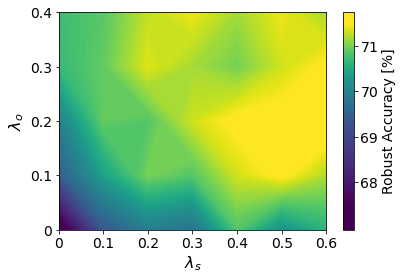

In [8]:
midnorm1 = MidpointNormalize(vmin=67.5, vcenter1=69.3, vcenter2=70.2, vcenter3=70.9, vmax=71.5)
font = {'size':16}

bild2 = plt.figure(figsize=[5,4], dpi=300)
bild2, ax = plt.subplots(1,1)
ax.set_xlabel(r'$\lambda_s$', fontdict=font, labelpad=+4)
ax.set_ylabel(r'$\lambda_o$', fontdict=font, labelpad=+4)

plt.xticks(np.arange(0, 7, 1), ('0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'))
plt.yticks(np.arange(0, 5, 1), ('0', '0.1', '0.2', '0.3', '0.4'))

plot = plt.contourf(X, Y, Z2, cmap='viridis', levels=200, norm = midnorm1)

ax.tick_params(axis='both', which='major', labelsize=14, pad=+3)
ax.tick_params(axis='both', which='minor', labelsize=14, pad=+5)

cbar = bild2.colorbar(plot, ticks=[68,69,70,71], pad = 0.05) # Add a colorbar to a plot
cbar.set_label(label='Robust Accuracy [%]', size=14)
cbar.ax.tick_params(labelsize=14, pad=+3)

bild2.savefig("C100-rob-stylized-ratio-grid.pdf",dpi=300, bbox_inches='tight')
bild2.savefig("C100-rob-stylized-ratio-grid.png",dpi=300, bbox_inches='tight')

<Figure size 1500x1200 with 0 Axes>

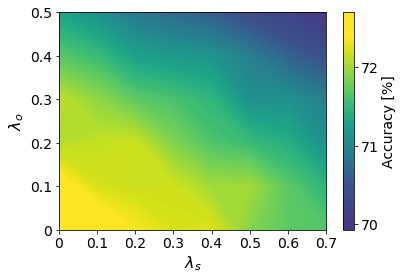

In [9]:
midnorm1 = MidpointNormalize(vmin=69, vcenter1=70.5, vcenter2=71.1, vcenter3=71.7, vmax=72.4)
font = {'size':16}

bild2 = plt.figure(figsize=[5,4], dpi=300)
bild2, ax = plt.subplots(1,1)
ax.set_xlabel(r'$\lambda_s$', fontdict=font, labelpad=+4)
ax.set_ylabel(r'$\lambda_o$', fontdict=font, labelpad=+4)

plt.xticks(np.arange(0, 8, 1), ('0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'))
plt.yticks(np.arange(0, 6, 1), ('0', '0.1', '0.2', '0.3', '0.4', '0.5'))

plot = plt.contourf(X1, Y1, Z3, cmap='viridis', levels=200, norm = midnorm1)

ax.tick_params(axis='both', which='major', labelsize=14, pad=+3)
ax.tick_params(axis='both', which='minor', labelsize=14, pad=+5)

cbar = bild2.colorbar(plot, ticks=[69,70,71,72,73], pad = 0.05) # Add a colorbar to a plot
cbar.set_label(label='Accuracy [%]', size=14)
cbar.ax.tick_params(labelsize=14, pad=+3)

bild2.savefig("TIN-acc-stylized-ratio-grid.pdf",dpi=300, bbox_inches='tight')
bild2.savefig("TIN-acc-stylized-ratio-grid.png",dpi=300, bbox_inches='tight')

<Figure size 1500x1200 with 0 Axes>

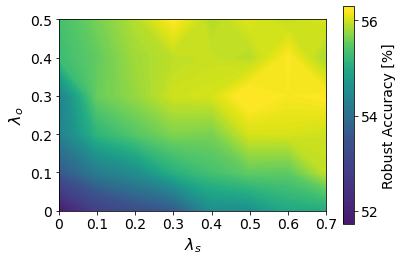

In [10]:
midnorm1 = MidpointNormalize(vmin=51, vcenter1=53.5, vcenter2=54.6, vcenter3=55.5, vmax=56.2)
font = {'size':16}

bild2 = plt.figure(figsize=[5,4], dpi=300)
bild2, ax = plt.subplots(1,1)
ax.set_xlabel(r'$\lambda_s$', fontdict=font, labelpad=+4)
ax.set_ylabel(r'$\lambda_o$', fontdict=font, labelpad=+4)

ax.set_aspect('equal')

plt.xticks(np.arange(0, 8, 1), ('0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'))
plt.yticks(np.arange(0, 6, 1), ('0', '0.1', '0.2', '0.3', '0.4', '0.5'))

plot = plt.contourf(X1, Y1, Z4, cmap='viridis', levels=200, norm = midnorm1)

ax.tick_params(axis='both', which='major', labelsize=14, pad=+3)
ax.tick_params(axis='both', which='minor', labelsize=14, pad=+5)

cbar = bild2.colorbar(plot, ticks=[50,52,54,56], pad = 0.05) # Add a colorbar to a plot
cbar.set_label(label='Robust Accuracy [%]', size=14)
cbar.ax.tick_params(labelsize=14, pad=+3)

bild2.savefig("TIN-rob-stylized-ratio-grid.pdf",dpi=300, bbox_inches='tight')
bild2.savefig("TIN-rob-stylized-ratio-grid.png",dpi=300, bbox_inches='tight')

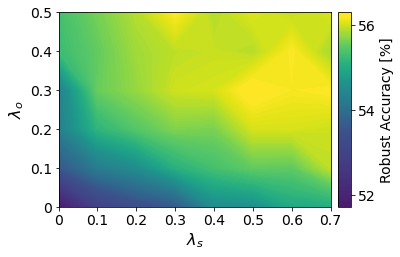

In [11]:
# Assume X1, Y1, Z4, MidpointNormalize, etc., are defined earlier
midnorm1 = MidpointNormalize(vmin=51, vcenter1=53.5, vcenter2=54.6, vcenter3=55.5, vmax=56.2)
font = {'size':16}

unit_size = 0.75
x_units = 7
y_units = 5
figsize = (x_units * unit_size, y_units * unit_size)

fig, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal')

ax.set_xlabel(r'$\lambda_s$', fontdict=font, labelpad=+4)
ax.set_ylabel(r'$\lambda_o$', fontdict=font, labelpad=+4)

ax.set_xticks(np.arange(0, 8, 1))
ax.set_xticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'])

ax.set_yticks(np.arange(0, 6, 1))
ax.set_yticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5'])

# Plot
plot = ax.contourf(X1, Y1, Z4, cmap='viridis', levels=200, norm=midnorm1)

# Tick styling
ax.tick_params(axis='both', which='major', labelsize=14, pad=+3)
ax.tick_params(axis='both', which='minor', labelsize=14, pad=+5)

# -----------------------------
# ✅ Add properly-sized colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 'size' and 'pad' can be adjusted

cbar = fig.colorbar(plot, cax=cax, ticks=[50, 52, 54, 56])
cbar.set_label(label='Robust Accuracy [%]', size=14)
cbar.ax.tick_params(labelsize=14, pad=+3)
# -----------------------------

# Save
fig.savefig("TIN-rob-stylized-ratio-grid.pdf", bbox_inches='tight')
fig.savefig("TIN-rob-stylized-ratio-grid.png", bbox_inches='tight')

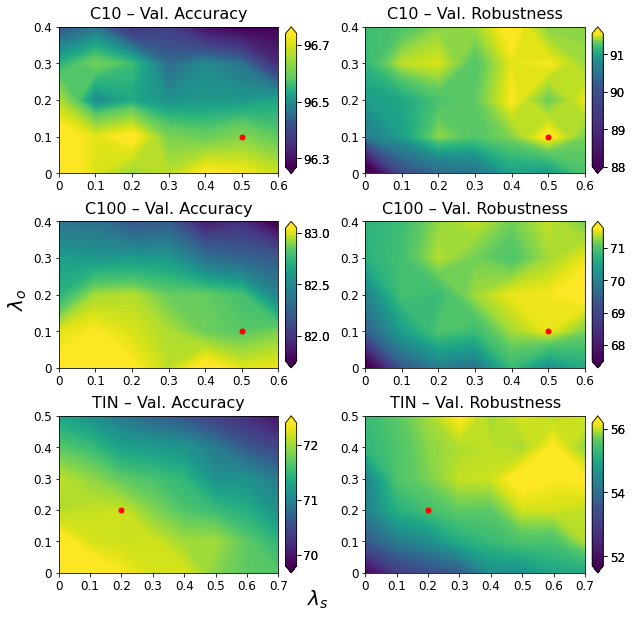

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- helper to build a subplot for one dataset ---
def make_subplot(ax, X, Y, Z, vmin, centers, vmax, xticks, yticks, c_ticks):
    # 1) mid‑norm + levels
    norm   = MidpointNormalize(
        vmin=vmin,
        vcenter1=centers[0],
        vcenter2=centers[1],
        vcenter3=centers[2],
        vmax=vmax)
    levels = np.linspace(vmin, vmax, 200)

    # 2) contourf
    cf = ax.contourf(
        X, Y, Z,
        cmap='viridis',
        levels=levels,
        norm=norm,
        extend='both')

    # 3) equal aspect & ticks
    ax.set_aspect('equal')
    ax.set_xticks(xticks)
    ax.set_xticklabels([0]+[f"{x/10:.1f}" for x in xticks[1:]], fontsize=12)
    ax.set_yticks(yticks)
    ax.set_yticklabels([0]+[f"{y/10:.1f}" for y in yticks[1:]], fontsize=12)
    ax.tick_params(pad=3)

    # 4) colorbar (no label)
    divider = make_axes_locatable(ax)
    cax     = divider.append_axes("right", size="5%", pad=0.1)
    cbar    = ax.figure.colorbar(cf, cax=cax, ticks=c_ticks, extend='both')
    cbar.ax.tick_params(labelsize=12, pad=3)

    return cf

# --- data specs for each subplot ---
specs = [
    (X,  Y, Z5,  96.27, [96.42,96.5,96.58], 96.74, np.arange(0,7), np.arange(0,5), [96.3,96.5,96.7]),
    (X,  Y, Z6,  88.0, [90.1,90.85,91.3], 91.55, np.arange(0,7), np.arange(0,5), [88,89,90,91]),
    (X,  Y, Z1,  81.75, [82.15,82.55,82.85], 83.05, np.arange(0,7), np.arange(0,5), [82,82.5,83]),
    (X,  Y, Z2,  67.5, [69.3,70.2,71.1], 71.62, np.arange(0,7), np.arange(0,5), [68,69,70,71]),
    (X1, Y1,Z3,  69.8, [70.6,71.1,71.7], 72.4, np.arange(0,8), np.arange(0,6), [70,71,72]),
    (X1, Y1,Z4,  51.7, [53.5,54.6,55.65], 56.18, np.arange(0,8), np.arange(0,6), [52,54,56]),
]

# --- figure & axes (no sharex/sharey) ---
fig, axes = plt.subplots(
    3, 2,
    figsize=(2*0.5*8, 3*0.5*5.5),  # unit_size=0.5" per data-unit
    constrained_layout=True,
    gridspec_kw={'wspace': 0.15}
)

# --- populate all subplots ---
for ax, spec in zip(axes.flat, specs):
    make_subplot(ax, *spec)

# --- populate all subplots ---
for i, (ax, spec) in enumerate(zip(axes.flat, specs)):
    make_subplot(ax, *spec)

    # Determine "max" mark location
    if i < 4:  # First two rows
        x_max, y_max = 5.0, 1.0
    else:      # Last row
        x_max, y_max = 2.0, 2.0

    
    # Add the "max" mark
    ax.plot(x_max, y_max, marker='o', markersize=5, color='red', zorder=10)
#        ax.text(x_max, y_max + 0.08, 'C10 optimum', color='red', fontsize=11, 
#                ha='center', va='bottom', zorder=11)
        
# --- titles for each panel ---
axes[0,0].set_title("C10 – Val. Accuracy",   size=16, pad=8)
axes[0,1].set_title("C10 – Val. Robustness", size=16, pad=8)
axes[1,0].set_title("C100 – Val. Accuracy",   size=16, pad=8)
axes[1,1].set_title("C100 – Val. Robustness", size=16, pad=8)
axes[2,0].set_title("TIN – Val. Accuracy",    size=16, pad=8)
axes[2,1].set_title("TIN – Val. Robustness",  size=16, pad=8)

# --- remove Y‑labels on right column ---
for ax in axes[:,1]:
    ax.set_ylabel('')

# --- remove all per‑subplot axis labels ---
for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')

# --- add global axis labels by hand ---
fig.text(0.5, -0.015,  r'$\lambda_s$', fontsize=20, ha='center')
fig.text(-0.04, 0.5, r'$\lambda_o$', fontsize=20, va='center', rotation='vertical')

# --- save and show ---
plt.savefig("all_6_subplots_manual_labels.png", dpi=300, bbox_inches='tight')
plt.savefig("all_6_subplots_manual_labels.pdf", dpi=300, bbox_inches='tight')


In [13]:
#learning curve visualization

#import numpy as np
#train1 = np.loadtxt(f'/kaggle/input/cifar100-new/config2_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', delimiter=';')[:,0]
#valid1 = np.loadtxt(f'/kaggle/input/cifar100-new/config2_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', delimiter=';')[:,2]
#robust1 = np.loadtxt(f'/kaggle/input/cifar100-new/config2_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', delimiter=';')[:,4]
#train2 = np.loadtxt(f'/kaggle/input/cifar100-new/config3_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', delimiter=';')[:,0]
#valid2 = np.loadtxt(f'/kaggle/input/cifar100-new/config3_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', delimiter=';')[:,2]
#robust2 = np.loadtxt(f'/kaggle/input/cifar100-new/config3_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', delimiter=';')[:,4]
#
#font1 = {'size':12}
#font2 = {'size':10}
#
#plt.figure(figsize=[6,7])
#x = list(range(1, len(train1) + 1))
#plt.plot(x, train1, label='TA Train', color='green', linestyle='dashed')
#plt.plot(x, valid1, label='TA Validation', color='green')
#plt.plot(x, valid1, label='TA Robust', color='green', linestyle='dotted')
#plt.plot(x, train2, label='TA + Combined Coise Train', color='green', linestyle='dashed')
#plt.plot(x, valid2, label='TA + Combined Coise Validation', color='green')
#plt.plot(x, valid2, label='TA + Combined Coise Robust', color='green', linestyle='dotted')
#
#
#plt.xlabel('Epochs', fontdict=font1)
#plt.ylim(70, 100)
#plt.ylabel('Accuracy', fontdict=font1, labelpad=-2)
#plt.xticks(np.arange(0, len(train1) + 1, (len(train1)) / 10))
#plt.legend(loc='best')
#
#plt.savefig('learning-curves.pdf')

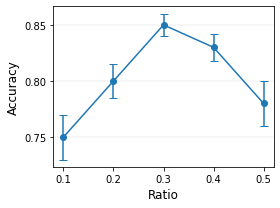

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ─── INSERT YOUR DATA HERE ─────────────────────────────────────────────────────
ratios = np.array([0.1, 0.2, 0.3, 0.4, 0.5])       # discrete ratio values
means  = np.array([0.75, 0.80, 0.85, 0.83, 0.78]) # accuracy means
stds   = np.array([0.02, 0.015, 0.01, 0.012, 0.02]) # standard deviations
# ────────────────────────────────────────────────────────────────────────────────

# find optimum
opt_idx   = np.argmax(means)
opt_ratio = ratios[opt_idx]
opt_acc   = means[opt_idx]

plt.figure(figsize=(4,3))  # small figure

# error‐bar with dark blue, caps, no title
plt.errorbar(
    ratios, means, yerr=stds,
    marker='o', linestyle='-',
    color='C0', ecolor='C0', capsize=4
)

# only horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.3)

# axis labels with larger font
plt.xlabel('Ratio',   fontsize=12)
plt.ylabel('Accuracy',fontsize=12)

# set y‑axis ticks every 0.05 (5%)
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

# larger tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# annotate optimum
#plt.annotate(
#    f'Max at {opt_ratio:.2f}',
#    xy=(opt_ratio, opt_acc),
#    xytext=(opt_ratio, opt_acc + 0.05),
#    arrowprops=dict(arrowstyle='->', color='C0')
#)

plt.tight_layout()
# save as PDF for Overleaf
plt.savefig('accuracy_vs_ratio.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('accuracy_vs_ratio.png', dpi=300)  # alternative raster format

plt.show()


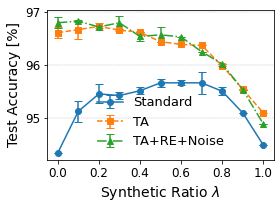

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# ─── EXAMPLE DATA FOR THREE SERIES ─────────────────────────────────────────────
ratios = np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0])

means1 = np.array([94.33,95.12,95.45,95.42,95.51,95.66,95.66,95.66,95.5,95.09,94.48])
stds1  = np.array([0.0,0.2,0.18,0.07,0.07,0.08,0.05,0.21,0.08,0.0,0.0])

means2 = np.array([96.61,96.67,96.73,96.66,96.62,96.44,96.39,96.37,95.98,95.54,95.09])
stds2  = np.array([0.1,0.17,0.07,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

means3 = np.array([96.8,96.83,96.72,96.8,96.54,96.57,96.53,96.25,96.02,95.53,94.88])
stds3  = np.array([0.1,0.02,0.02,0.12,0.08,0.14,0.0,0.0,0.0,0.0,0.0])
# ────────────────────────────────────────────────────────────────────────────────

plt.figure(figsize=(4,3))


# plot three series with distinct colors and labels
plt.errorbar(ratios, means1, yerr=stds1, marker='o', linestyle='-', label='Standard', color='C0', ecolor='C0', capsize=4)
plt.errorbar(ratios, means2, yerr=stds2, marker='s', linestyle='--', label='TA', color='C1', ecolor='C1', capsize=4)
plt.errorbar(ratios, means3, yerr=stds3, marker='^', linestyle='-.', label='TA+RE+Noise', color='C2', ecolor='C2', capsize=4)

# only horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.4)

# axis labels and tick formatting
plt.xlabel(r'Synthetic Ratio $\lambda$', fontsize=14)
plt.ylabel('Test Accuracy [%]', fontsize=14)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# legend
plt.legend(frameon=False, fontsize=13, loc='lower center')

plt.tight_layout()
# save as PDF for Overleaf
plt.savefig('C10_generated_ratio.pdf', format='pdf', bbox_inches='tight')
plt.show()


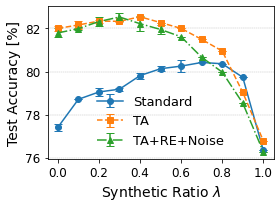

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# ─── EXAMPLE DATA FOR THREE SERIES ─────────────────────────────────────────────
ratios = np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0])

means1 = np.array([77.41,78.71,79.05,79.18,79.81,80.13,80.25,80.42,80.36,79.73,76.34])
stds1  = np.array([0.16,0.0,0.17,0.07,0.14,0.11,0.27,0.0,0.0,0.0,0.0])

means2 = np.array([82,82.16,82.34,82.33,82.54,82.27,82,81.49,80.95,79.03,76.78])
stds2  = np.array([0.1,0.17,0.07,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

means3 = np.array([81.79,81.99,82.32,82.53,82.22,81.95,81.61,80.66,79.97,78.53,76.27])
stds3  = np.array([0.21,0.05,0.22,0.17,0.34,0.23,0.0,0.0,0.0,0.0,0.0])
# ────────────────────────────────────────────────────────────────────────────────

plt.figure(figsize=(4,3))


# plot three series with distinct colors and labels
plt.errorbar(ratios, means1, yerr=stds1, marker='o', linestyle='-', label='Standard', color='C0', ecolor='C0', capsize=4)
plt.errorbar(ratios, means2, yerr=stds2, marker='s', linestyle='--', label='TA', color='C1', ecolor='C1', capsize=4)
plt.errorbar(ratios, means3, yerr=stds3, marker='^', linestyle='-.', label='TA+RE+Noise', color='C2', ecolor='C2', capsize=4)

# only horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.4)

# axis labels and tick formatting
plt.xlabel(r'Synthetic Ratio $\lambda$', fontsize=14)
plt.ylabel('Test Accuracy [%]', fontsize=14)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(2.0))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# legend
plt.legend(frameon=False, fontsize=13, loc='lower center')

plt.tight_layout()
# save as PDF for Overleaf
plt.savefig('C100_generated_ratio.pdf', format='pdf', bbox_inches='tight')
plt.show()


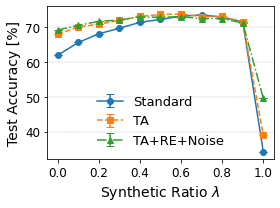

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# ─── EXAMPLE DATA FOR THREE SERIES ─────────────────────────────────────────────
ratios = np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0])

means1 = np.array([61.95,65.65,68.15,69.75,71.45,72.3,73.24,73.6,72.97,71.59,34.15])
stds1  = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.13,0.0,0.0,0.0])

means2 = np.array([68.01,70.13,70.89,72.02,73.15,73.72,73.82,73.13,73.14,71.53,38.91])
stds2  = np.array([0.0,0.0,0.0,0.0,0.28,0.09,0.23,0.0,0.0,0.0,0.0])

means3 = np.array([69.23,70.6,71.74,72.12,73.04,72.89,73.08,72.56,72.53,71.29,49.56])
stds3  = np.array([0.0,0.0,0.0,0.0,0.16,0.32,0.26,0.28,0.0,0.0,0.0])
# ────────────────────────────────────────────────────────────────────────────────

plt.figure(figsize=(4,3))


# plot three series with distinct colors and labels
plt.errorbar(ratios, means1, yerr=stds1, marker='o', linestyle='-', label='Standard', color='C0', ecolor='C0', capsize=4)
plt.errorbar(ratios, means2, yerr=stds2, marker='s', linestyle='--', label='TA', color='C1', ecolor='C1', capsize=4)
plt.errorbar(ratios, means3, yerr=stds3, marker='^', linestyle='-.', label='TA+RE+Noise', color='C2', ecolor='C2', capsize=4)

# only horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.4)

# axis labels and tick formatting
plt.xlabel(r'Synthetic Ratio $\lambda$', fontsize=14)
plt.ylabel('Test Accuracy [%]', fontsize=14)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# legend
plt.legend(frameon=False, fontsize=13, loc='lower center')

plt.tight_layout()
# save as PDF for Overleaf
plt.savefig('TIN_generated_ratio.pdf', format='pdf', bbox_inches='tight')
plt.show()


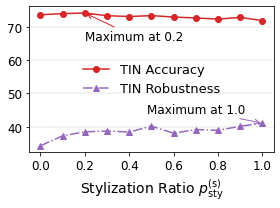

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# ─── EXAMPLE DATA FOR THREE SERIES ─────────────────────────────────────────────
ratios = np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0])

means3 = np.array([73.6,73.96,74.13,73.34,73.08,73.36,72.93,72.65,72.32,72.82,71.86])
means4 = np.array([34.3,37.31,38.48,38.75,38.43,40.2,38.08,39.18,38.94,40.17,41.07])
# ────────────────────────────────────────────────────────────────────────────────

plt.figure(figsize=(4,3))


# plot series with distinct colors and labels
plt.plot(ratios, means3, marker='o', linestyle='-', label='TIN Accuracy', color='C3')
plt.plot(ratios, means4, marker='^', linestyle='-.', label='TIN Robustness', color='C4')

# only horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.4)

# axis labels and tick formatting
plt.xlabel(r'Stylization Ratio $p_{\mathrm{sty}}^{(\mathrm{s})}$', fontsize=14)
#plt.ylabel('Acc / Rob [%]', fontsize=14)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

plt.annotate(
    f'Maximum at 0.2',
    xy=(0.2, 74.13),
    xytext=(0.2, 74.13 - 8.0),
    arrowprops=dict(arrowstyle='->', color='C3'),
    fontsize=12
)

plt.annotate(
    f'Maximum at 1.0',
    xy=(1.0, 41.07),
    xytext=(0.48, 41.07 + 3.0),
    arrowprops=dict(arrowstyle='->', color='C4'),
    fontsize=12
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# legend
plt.legend(frameon=False, fontsize=13, loc='center')

plt.tight_layout()
# save as PDF for Overleaf
plt.savefig('stylization_ratio_TIN.pdf', format='pdf', bbox_inches='tight')
plt.show()

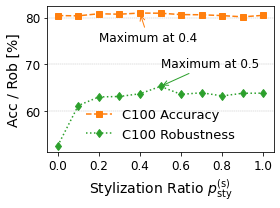

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# ─── EXAMPLE DATA FOR THREE SERIES ─────────────────────────────────────────────
ratios = np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0])

means1 = np.array([80.42,80.36,80.81,80.71,80.96,80.92,80.63,80.59,80.41,80.15,80.47])
means2 = np.array([52.59,61.2,63.03,63.13,63.71,65.29,63.58,63.93,63.25,63.82,63.84])

# ────────────────────────────────────────────────────────────────────────────────

plt.figure(figsize=(4,3))


# plot series with distinct colors and labels
plt.plot(ratios, means1, marker='s', linestyle='--', label='C100 Accuracy', color='C1')
plt.plot(ratios, means2, marker='d', linestyle=':', label='C100 Robustness', color='C2')

# only horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.4)

# axis labels and tick formatting
plt.xlabel(r'Stylization Ratio $p_{\mathrm{sty}}^{(\mathrm{s})}$', fontsize=14)
plt.ylabel('Acc / Rob [%]', fontsize=14)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

plt.annotate(
    f'Maximum at 0.4',
    xy=(0.4, 80.96),
    xytext=(0.2, 80.96 - 6.0),
    arrowprops=dict(arrowstyle='->', color='C1'),
    fontsize=12
)

plt.annotate(
    f'Maximum at 0.5',
    xy=(0.5, 65.29),
    xytext=(0.5, 65.29 + 4),
    arrowprops=dict(arrowstyle='->', color='C2'),
    fontsize=12
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# legend
plt.legend(frameon=False, fontsize=13, loc='lower center')

plt.tight_layout()
# save as PDF for Overleaf
plt.savefig('stylization_ratio_C100.pdf', format='pdf', bbox_inches='tight')
plt.show()

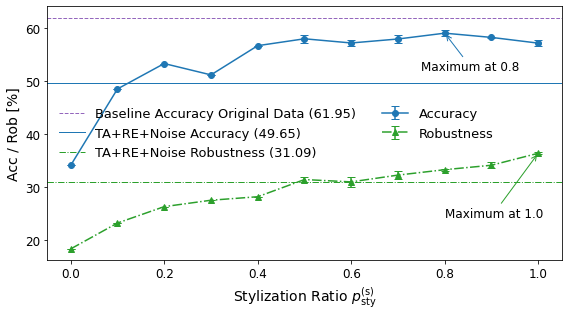

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


# ─── EXAMPLE DATA FOR THREE SERIES ─────────────────────────────────────────────
ratios = np.array([0.0,0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0])

means1 = np.array([34.15,48.56,53.35,51.21,56.72,58.02,57.23,57.98,59.08,58.28,57.2])
stds1  = np.array([0.0,0.0,0.0,0.0,0.0,0.78,0.62,0.77,0.62,0.05,0.56])
means3 = np.array([18.39,23.27,26.36,27.57,28.23,31.47,31.03,32.31,33.33,34.17,36.43])
stds3  = np.array([0.0,0.0,0.0,0.0,0.0,0.47,0.96,0.76,0.18,0.57,0.2])
# ────────────────────────────────────────────────────────────────────────────────

plt.figure(figsize=(8,4.5))


# plot series with distinct colors and labels
plt.errorbar(ratios, means1, yerr=stds1, marker='o', linestyle='-', label='Accuracy', color='C0', ecolor='C0', capsize=4)
plt.errorbar(ratios, means3, yerr=stds3, marker='^', linestyle='-.', label='Robustness', color='C2', ecolor='C2', capsize=4)

plt.axhline(
    y=61.95,          # the y‑value to mark
    color='C4',            # a distinct color
    linestyle='--',        # dashed line
    linewidth=1,
    label=f'Baseline Accuracy Original Data (61.95)'
)
plt.axhline(
    y=49.65,          # the y‑value to mark
    color='C0',            # a distinct color
    linestyle='-',        # dashed line
    linewidth=1,
    label=f'TA+RE+Noise Accuracy (49.65)'
)
plt.axhline(
    y=31.09,          # the y‑value to mark
    color='C2',            # a distinct color
    linestyle='-.',        # dashed line
    linewidth=1,
    label=f'TA+RE+Noise Robustness (31.09)'
)

# only horizontal grid lines
#plt.grid(axis='y', linestyle='--', linewidth=0.4)

# axis labels and tick formatting
plt.xlabel(r'Stylization Ratio $p_{\mathrm{sty}}^{(\mathrm{s})}$', fontsize=14)
plt.ylabel('Acc / Rob [%]', fontsize=14)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

plt.annotate(
    f'Maximum at 0.8',
    xy=(0.8, 59.08),
    xytext=(0.75, 59.08 - 7.0),
    arrowprops=dict(arrowstyle='->', color='C0'),
    fontsize=12
)

plt.annotate(
    f'Maximum at 1.0',
    xy=(1.0, 36.43),
    xytext=(0.8, 36.43 - 12.0),
    arrowprops=dict(arrowstyle='->', color='C2'),
    fontsize=12
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# legend
plt.legend(frameon=False, fontsize=13, ncol=2)

plt.tight_layout()
# save as PDF for Overleaf
plt.savefig('stylization_TIN_only_generated.pdf', format='pdf', bbox_inches='tight')
plt.show()

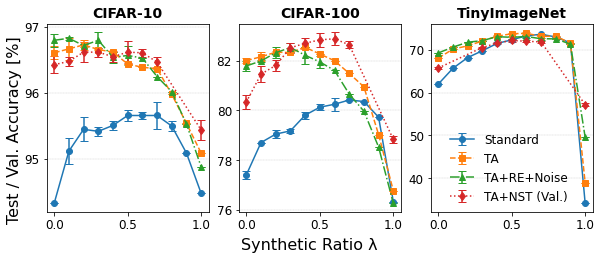

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Common x-axis
ratios = np.linspace(0, 1, 11)

# Data and configuration for each dataset
datasets = [
    {
        'means': [
            np.array([94.33,95.12,95.45,95.42,95.51,95.66,95.66,95.66,95.50,95.09,94.48]),
            np.array([96.61,96.67,96.73,96.66,96.62,96.44,96.39,96.37,95.98,95.54,95.09]),
            np.array([96.8,96.83,96.72,96.8,96.54,96.57,96.53,96.25,96.02,95.53,94.88]),
            np.array([96.43,96.48,96.62,96.62,96.55,96.62,96.61,96.47,np.nan,np.nan,95.44])
        ],
        'stds': [
            np.array([0.0,0.2,0.18,0.07,0.07,0.08,0.05,0.21,0.08,0.0,0.0]),
            np.array([0.1,0.17,0.07,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0]),
            np.array([0.1,0.02,0.02,0.12,0.08,0.14,0.0,0.0,0.0,0.0,0.0]),
            np.array([0.13,0.07,0.15,0.07,0.08,0.17,0.06,0.07,np.nan,np.nan,0.15])
        ],
        'y_locator': ticker.MultipleLocator(1.0),
        'title': 'CIFAR-10'
    },
    {
        'means': [
            np.array([77.41,78.71,79.05,79.18,79.81,80.13,80.25,80.42,80.36,79.73,76.34]),
            np.array([82,82.16,82.34,82.33,82.54,82.27,82,81.49,80.95,79.03,76.78]),
            np.array([81.79,81.99,82.32,82.53,82.22,81.95,81.61,80.66,79.97,78.53,76.27]),
            np.array([80.34,81.46,81.81,82.52,82.70,82.84,82.88,82.64,np.nan,np.nan,78.84])
        ],
        'stds': [
            np.array([0.16,0.0,0.17,0.07,0.14,0.11,0.27,0.0,0.0,0.0,0.0]),
            np.array([0.1,0.17,0.07,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0]),
            np.array([0.21,0.05,0.22,0.17,0.34,0.23,0.0,0.0,0.0,0.0,0.0]),
            np.array([0.27,0.32,0.22,0.2,0.21,0.28,0.26,0.14,np.nan,np.nan,0.15])
        ],
        'y_locator': ticker.MultipleLocator(2.0),
        'title': 'CIFAR-100'
    },
    {
        'means': [
            np.array([61.95,65.65,68.15,69.75,71.45,72.3,73.24,73.6,72.97,71.59,34.15]),
            np.array([68.01,70.13,70.89,72.02,73.15,73.72,73.82,73.13,73.14,71.53,38.91]),
            np.array([69.23,70.6,71.74,72.12,73.04,72.89,73.08,72.56,72.53,71.29,49.56]),
            np.array([65.72,np.nan,np.nan,70.50,71.56,72.15,71.97,71.82,np.nan,np.nan,57.16])
        ],
        'stds': [
            np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.13,0.0,0.0,0.0]),
            np.array([0.0,0.0,0.0,0.0,0.28,0.09,0.23,0.0,0.0,0.0,0.0]),
            np.array([0.0,0.0,0.0,0.0,0.16,0.32,0.26,0.28,0.0,0.0,0.0]),
            np.array([0.27,np.nan,np.nan,0.19,0.28,0.25,0.19,0.28,np.nan,np.nan,0.32])
        ],
        'y_locator': ticker.MultipleLocator(10.0),
        'title': 'TinyImageNet'
    }
]

markers = ['o', 's', '^', 'd']
linestyles = ['-', '--', '-.', ':']
colors = ['C0', 'C1', 'C2', 'C3']
labels = ['Standard', 'TA', 'TA+RE+Noise', 'TA+NST (Val.)']

# Create 1×3 grid (no shared y-axis)
fig, axes = plt.subplots(1, 3, figsize=(8, 3.5), constrained_layout=True)

for ax, data in zip(axes, datasets):
    for mean, std, mk, ls, col, lab in zip(data['means'], data['stds'], markers, linestyles, colors, labels):
        mask = ~np.isnan(mean)
        ax.errorbar(ratios[mask], mean[mask], yerr=std[mask], marker=mk, linestyle=ls,
                    color=col, ecolor=col, capsize=4, label=lab)
    ax.grid(axis='y', linestyle='--', linewidth=0.3)
    ax.set_title(data['title'], fontsize=14, fontweight='bold')
    #ax.set_xlabel(r'Synthetic Ratio $\lambda$', fontsize=12)
    ax.yaxis.set_major_locator(data['y_locator'])
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

#axes[2].set_ylim(35, 75)

# Combined y-axis label for the whole figure
fig.supxlabel('Synthetic Ratio λ', fontsize=16)
fig.supylabel('Test / Val. Accuracy [%]', fontsize=16, x=-0.025)

# Legend on left subplot
axes[2].legend(frameon=False, fontsize=12, loc=(0.09,0.02))
#h, l = axes[2].get_legend_handles_labels()
#fig.legend(h, l, frameon=True, fontsize=12, loc=(0.15,-0.02), ncol=4)

# save as PDF for Overleaf
plt.savefig('grid_generated_ratio.pdf', format='pdf', bbox_inches='tight')
plt.show()

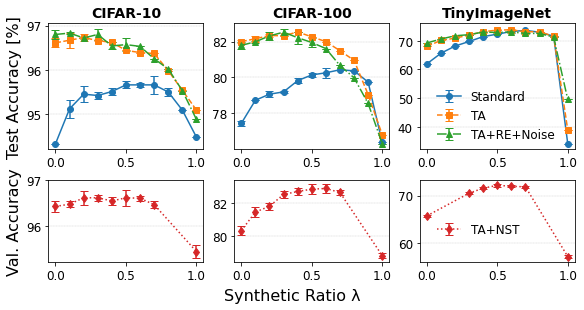

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Common x-axis
ratios = np.linspace(0, 1, 11)

# Data and configuration for each dataset
datasets = [
    {
        'means': [
            np.array([94.33,95.12,95.45,95.42,95.51,95.66,95.66,95.66,95.50,95.09,94.48]),
            np.array([96.61,96.67,96.73,96.66,96.62,96.44,96.39,96.37,95.98,95.54,95.09]),
            np.array([96.8,96.83,96.72,96.8,96.54,96.57,96.53,96.25,96.02,95.53,94.88]),
            np.array([96.43,96.48,96.62,96.62,96.55,96.62,96.61,96.47,np.nan,np.nan,95.44])
        ],
        'stds': [
            np.array([0.0,0.2,0.18,0.07,0.07,0.08,0.05,0.21,0.08,0.0,0.0]),
            np.array([0.1,0.17,0.07,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0]),
            np.array([0.1,0.02,0.02,0.12,0.08,0.14,0.0,0.0,0.0,0.0,0.0]),
            np.array([0.13,0.07,0.15,0.07,0.08,0.17,0.06,0.07,np.nan,np.nan,0.15])
        ],
        'y_locator': ticker.MultipleLocator(1.0),
        'title': 'CIFAR-10'
    },
    {
        'means': [
            np.array([77.41,78.71,79.05,79.18,79.81,80.13,80.25,80.42,80.36,79.73,76.34]),
            np.array([82,82.16,82.34,82.33,82.54,82.27,82,81.49,80.95,79.03,76.78]),
            np.array([81.79,81.99,82.32,82.53,82.22,81.95,81.61,80.66,79.97,78.53,76.27]),
            np.array([80.34,81.46,81.81,82.52,82.70,82.84,82.88,82.64,np.nan,np.nan,78.84])
        ],
        'stds': [
            np.array([0.16,0.0,0.17,0.07,0.14,0.11,0.27,0.0,0.0,0.0,0.0]),
            np.array([0.1,0.17,0.07,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0]),
            np.array([0.21,0.05,0.22,0.17,0.34,0.23,0.0,0.0,0.0,0.0,0.0]),
            np.array([0.27,0.32,0.22,0.2,0.21,0.28,0.26,0.14,np.nan,np.nan,0.15])
        ],
        'y_locator': ticker.MultipleLocator(2.0),
        'title': 'CIFAR-100'
    },
    {
        'means': [
            np.array([61.95,65.65,68.15,69.75,71.45,72.3,73.24,73.6,72.97,71.59,34.15]),
            np.array([68.01,70.13,70.89,72.02,73.15,73.72,73.82,73.13,73.14,71.53,38.91]),
            np.array([69.23,70.6,71.74,72.12,73.04,72.89,73.08,72.56,72.53,71.29,49.56]),
            np.array([65.72,np.nan,np.nan,70.50,71.56,72.15,71.97,71.82,np.nan,np.nan,57.16])
        ],
        'stds': [
            np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.13,0.0,0.0,0.0]),
            np.array([0.0,0.0,0.0,0.0,0.28,0.09,0.23,0.0,0.0,0.0,0.0]),
            np.array([0.0,0.0,0.0,0.0,0.16,0.32,0.26,0.28,0.0,0.0,0.0]),
            np.array([0.27,np.nan,np.nan,0.19,0.28,0.25,0.19,0.28,np.nan,np.nan,0.32])
        ],
        'y_locator': ticker.MultipleLocator(10.0),
        'title': 'TinyImageNet'
    }
]

markers = ['o', 's', '^', 'd']
linestyles = ['-', '--', '-.', ':']
colors = ['C0', 'C1', 'C2', 'C3']
labels = ['Standard', 'TA', 'TA+RE+Noise', 'TA+NST']

# Create 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(8, 4.2),
    gridspec_kw={'height_ratios': [1.55, 1]}, constrained_layout=True)

# Top row: original three series per dataset
for i, data in enumerate(datasets):
    ax = axes[0, i]
    for mean, std, mk, ls, col, lab in zip(
        data['means'][:3], data['stds'][:3], markers[:3], linestyles[:3], colors[:3], labels[:3]
    ):
        mask = ~np.isnan(mean)
        ax.errorbar(ratios[mask], mean[mask], yerr=std[mask], marker=mk,
                    linestyle=ls, color=col, ecolor=col, capsize=4, label=lab)
    ax.grid(axis='y', linestyle='--', linewidth=0.3)
    ax.set_title(data['title'], fontsize=14, fontweight='bold')
    ax.yaxis.set_major_locator(data['y_locator'])
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Bottom row: only the 4th series 'TA+NST (Val.)'
for i, data in enumerate(datasets):
    ax = axes[1, i]
    mean = data['means'][3]
    std = data['stds'][3]
    mask = ~np.isnan(mean)
    ax.errorbar(ratios[mask], mean[mask], yerr=std[mask], marker=markers[3],
                linestyle=linestyles[3], color=colors[3], ecolor=colors[3], capsize=4,
                label=labels[3])
    ax.grid(axis='y', linestyle='--', linewidth=0.3)
    # Separate y-label for bottom row
    ax.yaxis.set_major_locator(data['y_locator'])
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Shared figure labels
fig.supxlabel('Synthetic Ratio λ', fontsize=16)
#fig.supylabel('Test / Val. Accuracy [%]', fontsize=16, x=-0.02)
axes[0, 0].set_ylabel('Test Accuracy [%]', fontsize=16, x=-0.02)
axes[1, 0].set_ylabel('Val. Accuracy', fontsize=16, x=-0.02)

# Legends for top and bottom rows on rightmost plots
axes[0, 2].legend(frameon=False, fontsize=12, loc=(0.08,0.03))
axes[1, 2].legend(frameon=False, fontsize=12, loc=(0.08,0.25))

axes[0,2].set_yticks(np.arange(40, 75, 10))
axes[1,0].set_yticks(np.arange(96, 98, 1.0))

# Save and display
plt.savefig('grid_generated_ratio_2x3.pdf', format='pdf', bbox_inches='tight')
plt.show()


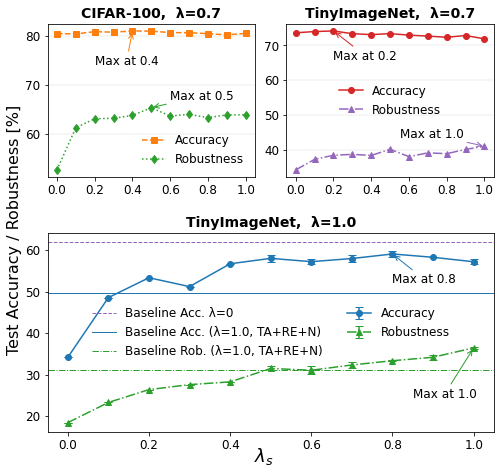

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec

# Common x-axis
ratios = np.linspace(0, 1, 11)

# CIFAR‑100 data (top left)
c100_acc = np.array([80.42,80.36,80.81,80.71,80.96,80.92,80.63,80.59,80.41,80.15,80.47])
c100_rob = np.array([52.59,61.2,63.03,63.13,63.71,65.29,63.58,63.93,63.25,63.82,63.84])

# TinyImageNet data (top right)
tin_acc = np.array([73.6,73.96,74.13,73.34,73.08,73.36,72.93,72.65,72.32,72.82,71.86])
tin_rob = np.array([34.3,37.31,38.48,38.75,38.43,40.2,38.08,39.18,38.94,40.17,41.07])

# Third plot data (bottom, spans both columns)
gen_acc = np.array([34.15,48.56,53.35,51.21,56.72,58.02,57.23,57.98,59.08,58.28,57.2])
gen_std = np.array([0.0,0.0,0.0,0.0,0.0,0.78,0.62,0.77,0.62,0.05,0.56])
gen_rob = np.array([18.39,23.27,26.36,27.57,28.23,31.47,31.03,32.31,33.33,34.17,36.43])
rob_std = np.array([0.0,0.0,0.0,0.0,0.0,0.47,0.96,0.76,0.18,0.57,0.2])

fig = plt.figure(figsize=(8, 7.5))
gs  = GridSpec(2, 2, figure=fig, height_ratios=[1, 1.3], hspace=0.32, wspace=0.15)

ax1 = fig.add_subplot(gs[0, 0])   # top left
ax2 = fig.add_subplot(gs[0, 1])   # top right
ax3 = fig.add_subplot(gs[1, :])   # bottom spans both

# — Top‑left: CIFAR‑100 —
ax1.plot(ratios, c100_acc, marker='s', linestyle='--', color='C1', label='Accuracy')
ax1.plot(ratios, c100_rob, marker='d', linestyle=':',  color='C2', label='Robustness')
ax1.grid(axis='y', linestyle='--', linewidth=0.3)
ax1.set_title('CIFAR‑100,  λ=0.7', fontsize=14, fontweight='bold')
#ax1.set_ylabel('Acc / Rob [%]', fontsize=12)
#ax1.set_xlabel(r'$p_{\mathrm{sty}}^{(\mathrm{s})}$', fontsize=12)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.tick_params(labelsize=12)
ax1.legend(frameon=False, fontsize=12)

ax1.annotate('Max at 0.4', xy=(0.4,80.96), xytext=(0.2,74),
             arrowprops=dict(arrowstyle='->', color='C1'), fontsize=12)
ax1.annotate('Max at 0.5', xy=(0.5,65.29), xytext=(0.6,67),
             arrowprops=dict(arrowstyle='->', color='C2'), fontsize=12)

# — Top‑right: TinyImageNet —
ax2.plot(ratios, tin_acc, marker='o', linestyle='-',  color='C3', label='Accuracy')
ax2.plot(ratios, tin_rob, marker='^', linestyle='-.', color='C4', label='Robustness')
ax2.grid(axis='y', linestyle='--', linewidth=0.3)
ax2.set_title('TinyImageNet,  λ=0.7', fontsize=14, fontweight='bold')
#ax2.set_xlabel(r'$p_{\mathrm{sty}}^{(\mathrm{s})}$', fontsize=12)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax2.tick_params(labelsize=12)
ax2.legend(frameon=False, fontsize=12, loc='center')

ax2.annotate('Max at 0.2', xy=(0.2,74.13), xytext=(0.2,66),
             arrowprops=dict(arrowstyle='->', color='C3'), fontsize=12)
ax2.annotate('Max at 1.0', xy=(1.0,41.07), xytext=(0.55,43.5),
             arrowprops=dict(arrowstyle='->', color='C4'), fontsize=12)

# — Bottom: Generated data series —
ax3.errorbar(ratios, gen_acc, yerr=gen_std, marker='o', linestyle='-', color='C0', ecolor='C0', capsize=4, label='Accuracy')
ax3.errorbar(ratios, gen_rob, yerr=rob_std, marker='^', linestyle='-.', color='C2', ecolor='C2', capsize=4, label='Robustness')
ax3.axhline(61.95, color='C4', linestyle='--', linewidth=1, label='Baseline Acc. λ=0')
ax3.axhline(49.65, color='C0', linestyle='-',  linewidth=1, label='Baseline Acc. (λ=1.0, TA+RE+N)')
ax3.axhline(31.09, color='C2', linestyle='-.', linewidth=1, label='Baseline Rob. (λ=1.0, TA+RE+N)')
#ax3.grid(axis='y', linestyle='--', linewidth=0.3)
ax3.set_title('TinyImageNet,  λ=1.0', fontsize=14, fontweight='bold')
#ax3.set_xlabel(r'$p_{\mathrm{sty}}^{(\mathrm{s})}$', fontsize=12)
#ax3.set_ylabel('Acc / Rob [%]', fontsize=12)
ax3.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax3.tick_params(labelsize=12)
ax3.legend(frameon=False, fontsize=12, ncol=2, loc='center')

ax3.annotate(
    f'Max at 0.8',
    xy=(0.8, 59.08),
    xytext=(0.8, 59.08 - 7.0),
    arrowprops=dict(arrowstyle='->', color='C0'),
    fontsize=12
)

ax3.annotate(
    f'Max at 1.0',
    xy=(1.0, 36.43),
    xytext=(0.85, 36.43 - 12.0),
    arrowprops=dict(arrowstyle='->', color='C2'),
    fontsize=12
)

# Combined y-axis label for the whole figure
fig.supxlabel(r'$\lambda_s$', fontsize=18, y=0.06)
fig.supylabel('Test Accuracy / Robustness [%]', fontsize=16, x=0.055)

plt.savefig('grid_stylization_ratio.pdf', format='pdf', bbox_inches='tight')
plt.show()

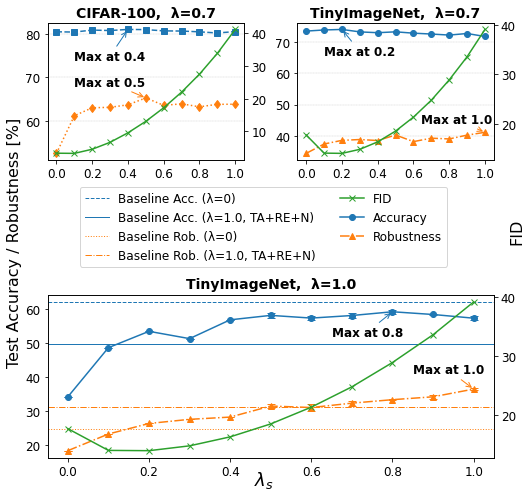

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec

# Common x-axis
ratios = np.linspace(0, 1, 11)

# CIFAR‑100 data (top left)
c100_acc = np.array([80.42,80.36,80.81,80.71,80.96,80.92,80.63,80.59,80.41,80.15,80.47])
c100_rob = np.array([52.59,61.2,63.03,63.13,63.71,65.29,63.58,63.93,63.25,63.82,63.84])

# TinyImageNet data (top right)
tin_acc = np.array([73.6,73.96,74.13,73.34,73.08,73.36,72.93,72.65,72.32,72.82,71.86])
tin_rob = np.array([34.3,37.31,38.48,38.75,38.43,40.2,38.08,39.18,38.94,40.17,41.07])

# Third plot data (bottom, spans both columns)
gen_acc = np.array([34.15,48.56,53.35,51.21,56.72,58.02,57.23,57.98,59.08,58.28,57.2])
gen_std = np.array([0.0,0.0,0.0,0.0,0.0,0.78,0.62,0.77,0.62,0.05,0.56])
gen_rob = np.array([18.39,23.27,26.36,27.57,28.23,31.47,31.03,32.31,33.33,34.17,36.43])
rob_std = np.array([0.0,0.0,0.0,0.0,0.0,0.47,0.96,0.76,0.18,0.57,0.2])

# New: FID data
fid1   = np.array([3.32, 3.27, 4.53, 6.65, 9.55, 13.06, 17.20, 21.98, 27.46, 33.82, 41.12])
fid23  = np.array([17.67, 13.99, 13.94, 14.76, 16.28, 18.47, 21.31, 24.75, 28.87, 33.57, 39.12])

# --- CONSISTENT COLORS ---
color_acc = 'C0'
color_rob = 'C1'
color_fid = 'C2'

fig = plt.figure(figsize=(8, 8))
gs  = GridSpec(2, 2, figure=fig, height_ratios=[1, 1.2], hspace=0.9, wspace=0.27)

ax1 = fig.add_subplot(gs[0, 0])   # top left
ax2 = fig.add_subplot(gs[0, 1])   # top right
ax3 = fig.add_subplot(gs[1, :])   # bottom spans both

# — Top‑left: CIFAR‑100 —
ax1.plot(ratios, c100_acc, marker='s', linestyle='--', color=color_acc, label='Accuracy')
ax1.plot(ratios, c100_rob, marker='d', linestyle=':',  color=color_rob, label='Robustness')
ax1.grid(axis='y', linestyle='--', linewidth=0.3)
ax1.set_title('CIFAR‑100,  λ=0.7', fontsize=14, fontweight='bold')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.tick_params(labelsize=12)
ax1.annotate('Max at 0.4', xy=(0.4,80.96), xytext=(0.1,74),
             arrowprops=dict(arrowstyle='->', color=color_acc), fontsize=12, fontweight='bold')
ax1.annotate('Max at 0.5', xy=(0.5,65.29), xytext=(0.1,68),
             arrowprops=dict(arrowstyle='->', color=color_rob), fontsize=12, fontweight='bold')

# FID on twin axis, no ylabel
ax1_fid = ax1.twinx()
ax1_fid.plot(ratios, fid1, marker='x', linestyle='-', color=color_fid, label='FID')
ax1_fid.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax1_fid.tick_params(labelsize=12)

# combine legends
lines, labels = ax1.get_legend_handles_labels()
l2, lab2     = ax1_fid.get_legend_handles_labels()
#ax1.legend(lines + l2, labels + lab2, frameon=False, fontsize=12)

# — Top‑right: TinyImageNet —
ax2.plot(ratios, tin_acc, marker='o', linestyle='-',  color=color_acc, label='Accuracy')
ax2.plot(ratios, tin_rob, marker='^', linestyle='-.', color=color_rob, label='Robustness')
ax2.grid(axis='y', linestyle='--', linewidth=0.3)
ax2.set_title('TinyImageNet,  λ=0.7', fontsize=14, fontweight='bold')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax2.tick_params(labelsize=12)
ax2.annotate('Max at 0.2', xy=(0.2,74.13), xytext=(0.1,66),
             arrowprops=dict(arrowstyle='->', color=color_acc), fontsize=12, fontweight='bold')
ax2.annotate('Max at 1.0', xy=(1.0,41.07), xytext=(0.64,44),
             arrowprops=dict(arrowstyle='->', color=color_rob), fontsize=12, fontweight='bold')

# FID on twin axis, no ylabel
ax2_fid = ax2.twinx()
ax2_fid.plot(ratios, fid23, marker='x', linestyle='-', color=color_fid, label='FID')
ax2_fid.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax2_fid.tick_params(labelsize=12)

# combine legends
lines, labels = ax2.get_legend_handles_labels()
l2, lab2     = ax2_fid.get_legend_handles_labels()
#ax2.legend(lines + l2, labels + lab2, frameon=False, fontsize=12, loc=(0.05,0.26))

# — Bottom: Generated data series —
ax3.errorbar(ratios, gen_acc, yerr=gen_std, marker='o', linestyle='-', color=color_acc,
             ecolor=color_acc, capsize=4)
ax3.errorbar(ratios, gen_rob, yerr=rob_std, marker='^', linestyle='-.', color=color_rob,
             ecolor=color_rob, capsize=4)
ax3.axhline(61.95, color='C0', linestyle='--', linewidth=1, label='Baseline Acc. (λ=0)')
ax3.axhline(49.65, color='C0', linestyle='-',  linewidth=1, label='Baseline Acc. (λ=1.0, TA+RE+N)')
ax3.axhline(24.61, color='C1', linestyle=':', linewidth=1, label='Baseline Rob. (λ=0)')
ax3.axhline(31.09, color='C1', linestyle='-.', linewidth=1, label='Baseline Rob. (λ=1.0, TA+RE+N)')
ax3.set_title('TinyImageNet,  λ=1.0', fontsize=14, fontweight='bold')
ax3.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax3.tick_params(labelsize=12)
ax3.annotate('Max at 0.8', xy=(0.8,59.08), xytext=(0.65,52.08),
             arrowprops=dict(arrowstyle='->', color=color_acc), fontsize=12, fontweight='bold')
ax3.annotate('Max at 1.0', xy=(1.0,36.43), xytext=(0.85,41),
             arrowprops=dict(arrowstyle='->', color=color_rob), fontsize=12, fontweight='bold')

# FID on twin axis, no ylabel
ax3_fid = ax3.twinx()
ax3_fid.plot(ratios, fid23, marker='x', linestyle='-', color=color_fid)
ax3_fid.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax3_fid.tick_params(labelsize=12)

# combine legends
lines, labels = ax3.get_legend_handles_labels()
l2, lab2     = ax3_fid.get_legend_handles_labels()
#ax3.legend(lines + l2, labels + lab2, frameon=False, fontsize=12, loc=(0.1,0.35))

# Combined x/y labels
fig.supxlabel(r'$\lambda_s$', fontsize=18, y=0.07)
fig.supylabel('Test Accuracy / Robustness [%]', fontsize=16, x=0.055)
fig.text(
    0.94,               # x-position in figure coordinates (0=left, 1=right)
    0.52,                # y-position (center)
    'FID',              # text
    va='center',        # vertical alignment
    ha='center',        # horizontal alignment
    rotation='vertical',
    fontsize=16
)

handles, labels = [], []
for ax in (ax3, ax1_fid, ax2):
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

fig.legend(
    handles, labels,
    loc='lower center',
    bbox_to_anchor=(0.5, 0.447),
    ncol=2,
    frameon=True,
    fontsize=12
)

plt.savefig('grid_stylization_ratio_with_fid.pdf', bbox_inches='tight')
plt.show()

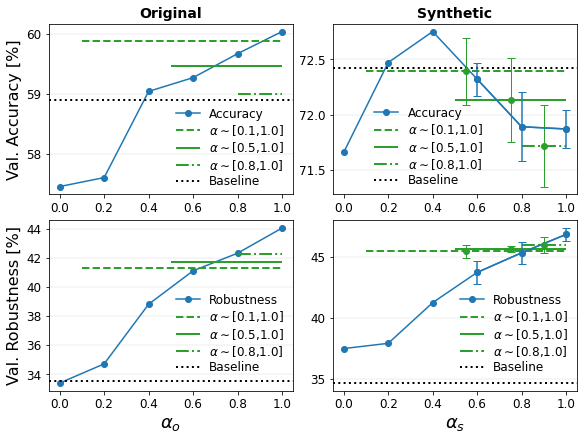

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Discrete α‑values
alpha_o = np.array([0.0,0.2,0.4,0.6,0.8,1.0])
alpha_s = np.array([0.0,0.2,0.4,0.6,0.8,1.0])

# Example measurements
orig_acc = np.array([57.45,57.6,59.04,59.27,59.67,60.04])
syn_acc  = np.array([71.66,72.47,72.75,72.32,71.89,71.87])
orig_rob = np.array([33.39,34.71,38.81,41.11,42.32,44.05])
syn_rob  = np.array([37.46,37.89,41.23,43.71,45.32,46.83])

errorbar_x = np.array([0.6,0.8,1.0])
acc_errorbar_y = np.array([72.32,71.89,71.87])
rob_errorbar_y = np.array([43.71,45.32,46.83])
acc_errorbar = np.array([0.15,0.31,0.17])
rob_errorbar = np.array([0.92,0.88,0.52])

errorbar_x_lines = np.array([0.55,0.75,0.9])
acc_errorbar_y_lines = np.array([72.39,72.13,71.72])
rob_errorbar_y_lines = np.array([45.45,45.66,45.97])
acc_errorbar_lines = np.array([0.3,0.38,0.37])
rob_errorbar_lines = np.array([0.53,0.25,0.66])

# Now give each subplot its own intervals and levels
configs = [
    # ax,      alphas,   values,    ylabel,      intervals,          baseline
    ('Original', alpha_o, orig_acc, 'Accuracy',   [(0.1,1.0,59.88),(0.5,1.0,59.47),(0.8,1.0,59.0)], 58.9),
    ('Synthetic',  alpha_s, syn_acc,  'Accuracy',   [(0.1,1.0,72.39),(0.5,1.0,72.13),(0.8,1.0,71.72)], 72.42),
    ('', alpha_o, orig_rob, 'Robustness', [(0.1,1.0,41.32),(0.5,1.0,41.71),(0.8,1.0,42.25)], 33.51),
    ('',  alpha_s, syn_rob,  'Robustness', [(0.1,1.0,45.45),(0.5,1.0,45.66),(0.8,1.0,45.97)], 34.63)    
]


fig, axes = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
axes = axes.flatten()

for ax, (name, alphas, vals, ylabel, ivs, baseline) in zip(axes, configs):
    # plot the discrete line
    ax.plot(alphas, vals, marker='o', linestyle='-', label=ylabel)
    # draw each interval with its own level
    for i, (start, end, level) in enumerate(ivs):
        if i == 0:
            style = '--'
        elif i == 1:
            style = '-'
        else:
            style = '-.'
        ax.hlines(level, start, end,
                  colors='C2', linestyles=style, linewidth=2,
                  label=rf'$\alpha\sim$[{start},{end}]')
    
    # baseline as a horizontal black line
    ax.axhline(baseline, color='k', linestyle=':', linewidth=2, label='Baseline')
    
    # formatting
    ax.set_title(name, fontsize=14, fontweight='bold')
    ax.xaxis.set_major_locator(ticker.FixedLocator(alphas))
    ax.grid(axis='y', linestyle='--', linewidth=0.3)
    ax.tick_params(labelsize=12)

axes[1].errorbar(errorbar_x, acc_errorbar_y, yerr=acc_errorbar, marker='o', linestyle='-', color='C0', capsize=4)
axes[1].errorbar(errorbar_x_lines, acc_errorbar_y_lines, yerr=acc_errorbar_lines, marker='o', linestyle='', elinewidth=1, color='C2', ecolor='C2', capsize=4)
axes[3].errorbar(errorbar_x, rob_errorbar_y, yerr=rob_errorbar, marker='o', linestyle='-', color='C0', capsize=4)
axes[3].errorbar(errorbar_x_lines, rob_errorbar_y_lines, yerr=rob_errorbar_lines, marker='o', linestyle='', elinewidth=1, color='C2', ecolor='C2', capsize=4)

axes[0].legend(frameon=False, fontsize=12, loc=(0.5,0.01), labelspacing=0.2)
axes[1].legend(frameon=False, fontsize=12, loc=(0.15,0.015), labelspacing=0.2)
axes[2].legend(frameon=False, fontsize=12, loc=(0.5,0.07), labelspacing=0.2)
axes[3].legend(frameon=False, fontsize=12, loc=(0.5,0.07), labelspacing=0.2)

# shared labels
axes[2].set_xlabel(r'$\alpha_o$', fontsize=18)
axes[3].set_xlabel(r'$\alpha_s$', fontsize=18)
axes[0].set_ylabel('Val. Accuracy [%]', fontsize=16)
axes[2].set_ylabel('Val. Robustness [%]', fontsize=16)
#axes[0].yaxis.set_label_coords(-0.15, 0.5)
#axes[2].yaxis.set_label_coords(-0.15, 0.5)

axes[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(0.5))
axes[2].yaxis.set_major_locator(ticker.MultipleLocator(2))
axes[3].yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.savefig('alpha_tuning.pdf', format='pdf', bbox_inches='tight')
plt.show()

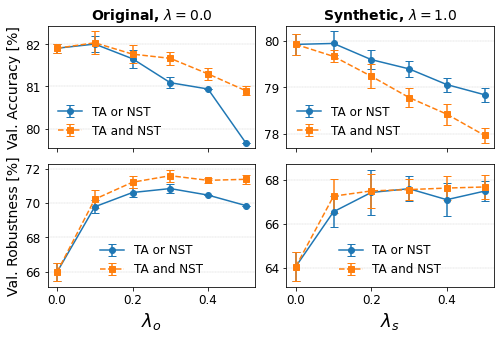

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# common x-axis
ratios = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# ─── placeholder data ─────────────────────────────────────────────────────────
# Original (λ=0.0)
acc1_orig = np.array([81.91,82.01,81.66,81.09,80.94,79.66])  # replace with your first accuracy series
acc2_orig = np.array([81.91,82.04,81.77,81.67,81.3,80.9])  # replace with your second accuracy series

rob1_orig = np.array([65.97,69.78,70.61,70.84,70.46,69.85])  # replace with your first robustness series
rob2_orig = np.array([65.97,70.22,71.21,71.59,71.32,71.38])  # replace with your second robustness series


error_acc1_orig = np.array([0.11,0.18,0.21,0.13,0.0,0.0])
error_acc2_orig = np.array([0.11,0.27,0.22,0.15,0.15,0.11])

error_rob1_orig = np.array([0.53,0.38,0.29,0.26,0.0,0.0])
error_rob2_orig = np.array([0.53,0.54,0.36,0.34,0.16,0.27])

# Synthetic (λ=1.0)
acc1_syn  = np.array([79.93,79.95,79.6,79.4,79.06,78.84])
acc2_syn  = np.array([79.93,79.67,79.24,78.78,78.42,77.96])

rob1_syn  = np.array([64.06,66.56,67.44,67.61,67.11,67.5])
rob2_syn  = np.array([64.06,67.27,67.51,67.57,67.64,67.69])

error_acc1_syn = np.array([0.22,0.26,0.2,0.18,0.15,0.15])
error_acc2_syn = np.array([0.22,0.13,0.26,0.2,0.23,0.16])

error_rob1_syn = np.array([0.67,0.7,1.03,0.58,0.75,0.44])
error_rob2_syn = np.array([0.67,0.78,0.76,0.49,0.56,0.54])

# ────────────────────────────────────────────────────────────────────────────────

fig, axes = plt.subplots(
    nrows=2, ncols=2,
    figsize=(8, 4.8),
    sharex=True,
    gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.13, 'wspace': 0.15}
)

# set up tick locators
#x_locator = ticker.MultipleLocator(0.2)
y_locator = ticker.MultipleLocator(1.0)

# Row 0: Accuracy
for col, (acc_a, acc_b, acc_err_a, acc_err_b, title) in enumerate([
    (acc1_orig, acc2_orig, error_acc1_orig, error_acc2_orig,  r'Original, $\lambda=0.0$'),
    (acc1_syn,  acc2_syn, error_acc1_syn, error_acc2_syn,  r'Synthetic, $\lambda=1.0$')
]):
    ax = axes[0, col]
    ax.errorbar(ratios, acc_a, yerr=acc_err_a, marker='o', linestyle='-', color='C0', capsize=4, label='TA or NST')
    ax.errorbar(ratios, acc_b, yerr=acc_err_b, marker='s', linestyle='--', color='C1', capsize=4, label='TA and NST')
    #ax.plot(ratios, acc_a, marker='o', color='C0', linestyle='-', label='TA or NST')
    #ax.plot(ratios, acc_b, marker='s', color='C1', linestyle='--', label='TA and NST')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.yaxis.set_major_locator(y_locator)
    #ax.xaxis.set_major_locator(x_locator)
    ax.tick_params(labelsize=12)
    ax.grid(axis='y', linestyle='--', linewidth=0.3)
    ax.legend(frameon=False, fontsize=12, loc='lower center')

# Row 1: Robustness
for col, (rob_a, rob_b, rob_err_a, rob_err_b) in enumerate([
    (rob1_orig, rob2_orig, error_rob1_orig, error_rob2_orig),
    (rob1_syn,  rob2_syn, error_rob1_syn, error_rob2_syn)
]):
    ax = axes[1, col]
    ax.errorbar(ratios, rob_a, yerr=rob_err_a, marker='o', linestyle='-', color='C0', capsize=4, label='TA or NST')
    ax.errorbar(ratios, rob_b, yerr=rob_err_b, marker='s', linestyle='--', color='C1', capsize=4, label='TA and NST')
    #ax.plot(ratios, rob_a, marker='^', color='C0', linestyle='-.', label='TA or NST')
    #ax.plot(ratios, rob_b, marker='d', color='C1', linestyle=':',  label='TA and NST')
    #ax.yaxis.set_major_locator(y_locator)
    #ax.xaxis.set_major_locator(x_locator)
    ax.tick_params(labelsize=12)
    ax.grid(axis='y', linestyle='--', linewidth=0.3)

axes[1,0].set_xlabel(r'$\lambda_o$', fontsize=18)
axes[1,1].set_xlabel(r'$\lambda_s$', fontsize=18)
axes[0,0].set_ylabel('Val. Accuracy [%]', fontsize=14)
axes[1,0].set_ylabel('Val. Robustness [%]', fontsize=14)

axes[0,0].legend(frameon=False, fontsize=12, loc='lower left')
axes[0,1].legend(frameon=False, fontsize=12, loc='lower left')
axes[1,0].legend(frameon=False, fontsize=12, loc='lower center')
axes[1,1].legend(frameon=False, fontsize=12, loc='lower center')
axes[0,0].set_yticks([80,81,82])

plt.savefig('TAandorNST.pdf', format='pdf', bbox_inches='tight')
plt.show()
